In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df_test = None
df_train = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-1-hw/cars_train.csv
/kaggle/input/cars-1-hw/cars_test.csv


In [2]:
%matplotlib inline 

In [3]:
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/cars-1-hw/cars_train.csv')
df.head()

,Price,Make,Model,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color,ID
0,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,0
1,8467,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,1
2,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,2
3,26657,LEXUS,RX 350,2007,Jeep,Petrol,NaN,128500 km,6.0,Automatic,4x4,Left wheel,Silver,3
4,8781,FORD,Transit,1999,Microbus,CNG,4,0 km,8.0,Manual,Rear,Left wheel,Blue,4


# Анализ данных и фильтрация

In [5]:
df.columns

Index(['Price', 'Make', 'Model', 'Year', 'Style', 'Fuel', 'Engine', 'Distance',
       'Cylinders', 'Transmission', 'Drive', 'Wheel', 'Color', 'ID'],
      dtype='object')

In [6]:
df["Drive"].value_counts()

Drive
Front    6469
4x4      1993
Rear     1157
Name: count, dtype: int64

In [7]:
df["Transmission"].value_counts()

Transmission
Automatic    6801
Tiptronic    1537
Manual        914
Variator      367
Name: count, dtype: int64

In [8]:
df["Wheel"].value_counts()

Wheel
Left wheel          8876
Right-hand drive     743
Name: count, dtype: int64

In [9]:
df.isnull().sum() 

Price            0
Make             0
Model            0
Year             0
Style            0
Fuel            96
Engine          96
Distance         0
Cylinders       96
Transmission     0
Drive            0
Wheel            0
Color            0
ID               0
dtype: int64

In [10]:
df = df.dropna(subset=['Fuel', 'Engine', 'Cylinders'])

In [11]:
def clear_any_data(df):
   df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
   df['Distance'] = df['Distance'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
   df['Wheel'] = df['Wheel'].map({'Left wheel':0,'Right-hand drive':1})
   return df
    
def clear_transmission(df):
    trans_map = {
        'Automatic': 0,
        'Tiptronic': 1,
        'Manual': 2,
        'Variator': 3,
    }
    
    df['Transmission'] = df['Transmission'].map(trans_map)
    return df
    
def clear_drive(df):
    drives_map = {
        'Front': 0,
        '4x4': 1,
        'Rear': 2,
    }
    df['Drive'] = df['Drive'].map(drives_map)
    return df
    
df = clear_drive(clear_transmission(clear_any_data(df))).drop(columns=['ID'])
df.head()

,Price,Make,Model,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color
0,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,1,1,0,Black
1,8467,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,3,0,1,Black
2,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,0,0,0,Silver
4,8781,FORD,Transit,1999,Microbus,CNG,4.0,0.0,8.0,2,2,0,Blue
5,3000,OPEL,Vectra,1997,Goods wagon,CNG,1.6,350000.0,4.0,2,0,0,White


In [12]:
curr_year = df['Year'].max() + 1
df['Age'] = (curr_year - df['Year']).clip(lower=1)

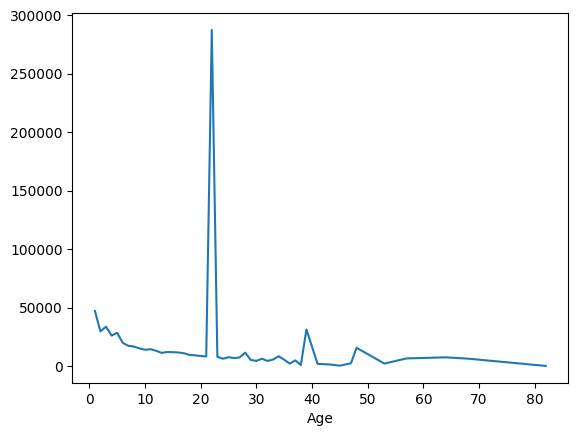

In [13]:
df_by_age = df.groupby('Age')['Price'].mean()
df_by_age.plot(); plt.show()

In [14]:
df_peak_by_age = df[(df['Age'] >= 20) & (df['Age'] <= 24)]
df_peak_by_age[['Make', 'Model', 'Year', 'Distance', 'Price']].sort_values('Price', ascending=False).head(10)

,Make,Model,Year,Distance,Price
8459,OPEL,Combo,1999,99999.0,26307500
1974,TOYOTA,RAV 4,2001,335267.0,46414
2984,PORSCHE,911 meqanika,1998,105498.0,37354
7695,TOYOTA,Land Cruiser,2001,250000.0,31361
5713,DODGE,RAM 1500,2000,60800.0,28225
3659,MERCEDES-BENZ,S 320,2001,270000.0,26657
7273,MERCEDES-BENZ,Sprinter,1998,290000.0,25716
2758,LINCOLN,Navigator,1999,99000.0,25089
2328,TOYOTA,Land Cruiser Prado,2000,150000.0,24148
9570,FORD,Transit,1999,430000.0,21953


In [15]:
median_price = df_peak_by_age['Price'].median()
df.loc[df['Price'] > 1000000, 'Price'] = median_price

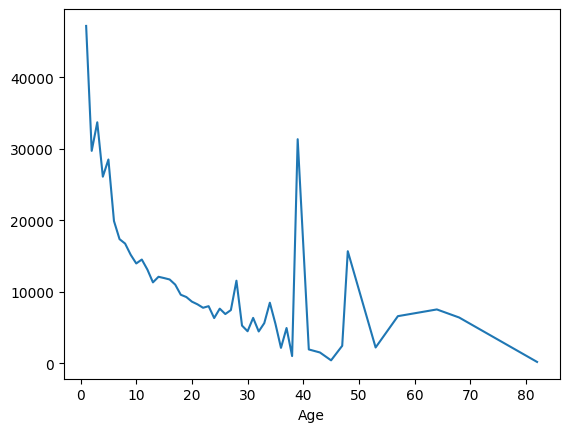

In [16]:
df_by_age = df.groupby('Age')['Price'].mean()
df_by_age.plot(); plt.show()

In [17]:
df_peak_by_40_age = df[(df['Age'] >= 37) & (df['Age'] <= 42)]
df_peak_by_40_age[['Make', 'Model', 'Year', 'Distance', 'Price', 'Age']].sort_values('Price', ascending=False).head(10)

,Make,Model,Year,Distance,Price,Age
7147,SUZUKI,Samurai,1982,29500.0,31361,39
1493,SUZUKI,Samurai,1984,100000.0,10976,37
4856,VOLKSWAGEN,Transporter,1980,111111.0,2700,41
4352,VAZ,2106,1984,90000.0,2000,37
2018,VAZ,2121 (Niva),1984,200000.0,1800,37
8816,VAZ,2111,1980,0.0,1150,41
1541,VAZ,2121 (Niva),1983,0.0,1000,38


In [18]:
df['Style'].value_counts()

Style
Sedan          4289
Jeep           2612
Hatchback      1350
Minivan         322
Coupe           257
Universal       185
Microbus        150
Goods wagon     121
Pickup           23
Cabriolet        17
Limousine         6
Name: count, dtype: int64

In [19]:
df.groupby('Style')['Price'].mean().sort_values(ascending=False)

Style
Pickup         32239.304348
Cabriolet      28848.882353
Jeep           23509.442190
Universal      23380.075676
Coupe          22342.081712
Minivan        21287.543478
Microbus       17980.706667
Sedan          13884.992772
Limousine      11845.000000
Hatchback      11094.685185
Goods wagon     9561.057851
Name: Price, dtype: float64

In [20]:
df = df[df['Style'] != 'Limousine'].reset_index(drop=True)
def simplify_style(style):
    if style == 'Cabriolet':
        return 'Coupe'
    return style
filter_df = df.copy()
filter_df['Style'] = filter_df['Style'].apply(simplify_style)
filter_df['Style'].value_counts()

Style
Sedan          4289
Jeep           2612
Hatchback      1350
Minivan         322
Coupe           274
Universal       185
Microbus        150
Goods wagon     121
Pickup           23
Name: count, dtype: int64

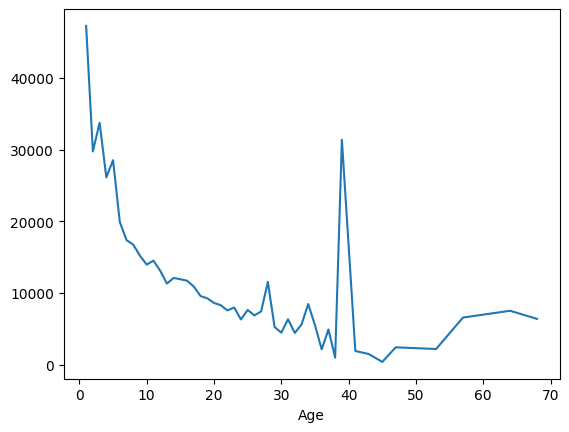

In [21]:
df_by_age = filter_df.groupby('Age')['Price'].mean()
df_by_age.plot(); plt.show()

In [22]:
filter_df[filter_df['Age'] > 50].shape[0]

7

In [23]:
filter_df = filter_df[filter_df['Age'] <= 50].reset_index(drop=True)

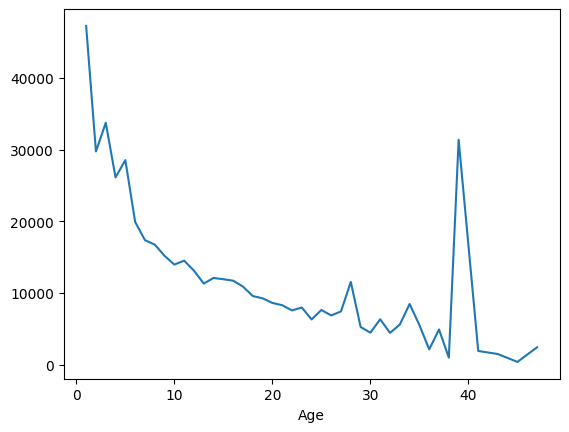

In [24]:
df_by_age = filter_df.groupby('Age')['Price'].mean()
df_by_age.plot(); plt.show()

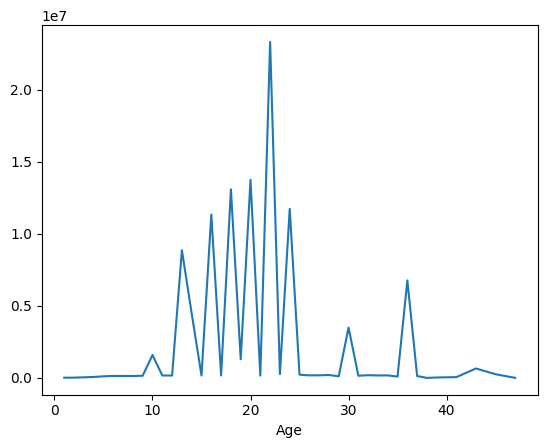

In [25]:
df_by_age_dist = filter_df.groupby('Age')['Distance'].mean()
df_by_age_dist.plot(); plt.show()

In [26]:
df_anomalous = filter_df[filter_df['Distance'] > 1_000_000]
df_anomalous[['Make', 'Model', 'Year', 'Age', 'Distance', 'Price']].sort_values('Distance', ascending=False)

,Make,Model,Year,Age,Distance,Price
9280,FORD,Transit,2003,18,2.147484e+09,18817
1115,VOLKSWAGEN,Golf,1999,22,2.147484e+09,6899
7447,TOYOTA,Prius,2008,13,2.147484e+09,15681
5770,SUBARU,Forester,2005,16,2.147484e+09,10036
8493,MERCEDES-BENZ,E 200,2001,20,1.777778e+09,4234
4606,TOYOTA,Prius,2011,10,1.111111e+09,50
8015,BMW,328,2007,14,1.000000e+09,14113
5158,NISSAN,Note,2008,13,1.000000e+09,6476
492,OPEL,Vectra,1997,24,7.777778e+08,2700
8954,MERCEDES-BENZ,E 270,2002,19,1.111111e+08,10976


In [27]:
median_dist_by_age = filter_df.groupby('Age')['Distance'].median()
filter_df.loc[filter_df['Distance'] > 1_000_000, 'Distance'] = median_dist_by_age

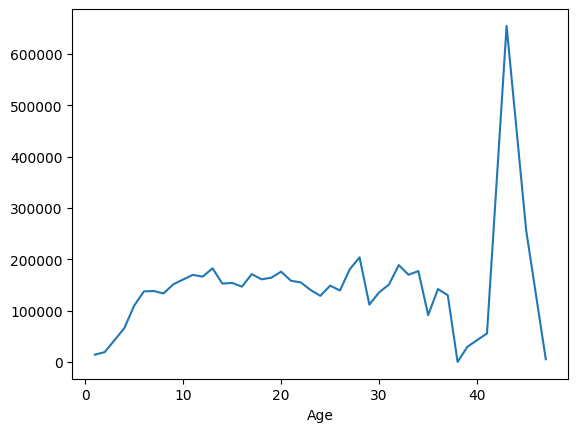

In [28]:
df_by_age_dist = filter_df.groupby('Age')['Distance'].mean()
df_by_age_dist.plot(); plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


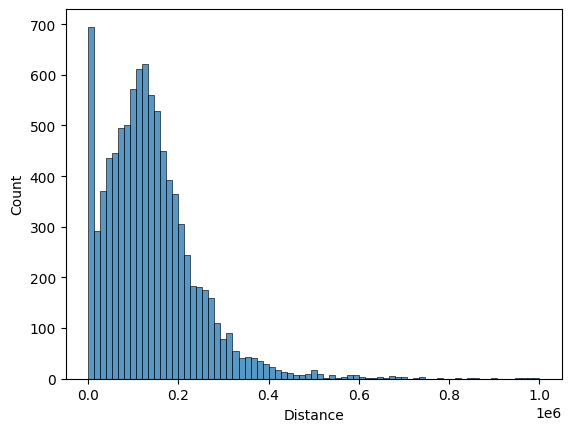

In [29]:
sns.histplot(filter_df['Distance'], bins=75)
plt.show()

In [30]:
filter_df["Model"].value_counts()

Model
Sonata           519
Prius            495
Camry            486
Elantra          437
E 350            261
                ... 
Astra GE           1
IS 300             1
A6 UNIVERSAL       1
S 550 ჰიბრიდი      1
Prius C aqua       1
Name: count, Length: 1009, dtype: int64

In [31]:
filter_df["Make"].value_counts()

Make
HYUNDAI          1831
TOYOTA           1781
MERCEDES-BENZ    1007
FORD              531
CHEVROLET         520
BMW               509
HONDA             470
LEXUS             466
NISSAN            339
VOLKSWAGEN        292
SSANGYONG         224
OPEL              203
KIA               203
MITSUBISHI        135
AUDI              125
SUBARU            119
MAZDA              77
JEEP               68
DAEWOO             47
DODGE              44
SUZUKI             38
FIAT               33
PORSCHE            27
MINI               25
JAGUAR             22
LAND ROVER         21
VAZ                21
RENAULT            17
INFINITI           15
CHRYSLER           11
SKODA              11
VOLVO               9
DAIHATSU            8
PEUGEOT             8
BUICK               8
LINCOLN             6
GAZ                 5
GMC                 5
ACURA               4
MASERATI            4
UAZ                 3
MERCURY             3
SCION               3
CADILLAC            3
CITROEN             2
ISUZU

In [32]:
filter_df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(15)

Make
BENTLEY          219527.000000
LAND ROVER        68068.476190
PORSCHE           55228.592593
HUMMER            45473.000000
FERRARI           31988.000000
JAGUAR            31950.590909
SSANGYONG         30732.611607
JEEP              28159.852941
HYUNDAI           22426.493719
MASERATI          20149.500000
BMW               19712.807466
LEXUS             19036.976395
MERCEDES-BENZ     17579.007944
INFINITI          17150.666667
MINI              16274.880000
Name: Price, dtype: float64

# Построение модели

In [33]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error 

In [34]:
df = filter_df.copy()
df.head()

,Price,Make,Model,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color,Age
0,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,1,1,0,Black,10
1,8467,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,3,0,1,Black,15
2,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,0,0,0,Silver,7
3,8781,FORD,Transit,1999,Microbus,CNG,4.0,0.0,8.0,2,2,0,Blue,22
4,3000,OPEL,Vectra,1997,Goods wagon,CNG,1.6,350000.0,4.0,2,0,0,White,24


In [35]:
X_raw = df.drop('Price', axis=1)
y = df['Price']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.15, random_state=42
)

train_df = X_train_raw.copy()
train_df['Price'] = y_train

# среднее цена по модели
model_price_map = train_df.groupby('Model')['Price'].mean()
# среднее цена по производителю
make_price_map = train_df.groupby('Make')['Price'].mean()
# среднее цена всех автомобилей
global_mean = y_train.mean()


X_train_raw['Model_price_mean'] = X_train_raw['Model'].map(model_price_map)
X_train_raw['Make_price_mean'] = X_train_raw['Make'].map(make_price_map)

X_test_raw['Model_price_mean'] = X_test_raw['Model'].map(model_price_map)
X_test_raw['Make_price_mean'] = X_test_raw['Make'].map(make_price_map)

# если есть машины, которых не было в train
X_test_raw['Model_price_mean'] = X_test_raw['Model_price_mean'].fillna(global_mean)
X_test_raw['Make_price_mean'] = X_test_raw['Make_price_mean'].fillna(global_mean)

X_train_raw = X_train_raw.drop(['Model', 'Make'], axis=1)
X_test_raw = X_test_raw.drop(['Model', 'Make'], axis=1)

def comb_metrics_for_split(df):
    df = df.copy()
    df['Engine * Year'] = np.log1p(df['Engine'] * df['Year'])
    df['Drive * Year'] = df['Drive'] * df['Year']
    df['Engine * Year / Distance'] = df['Engine * Year'] / df['Distance'].clip(lower=1)
    df['Mileage'] = df['Distance'] / df['Age']
    df['Log_mileage'] = np.log1p(df['Mileage'])
    df['Cylinders'] = np.log1p(df['Cylinders'])
    df['Cylinders * Distance'] = df['Cylinders'] * df['Distance']
    df['Cylinders * Age'] = df['Cylinders'] * df['Age']
    df['Model_price_mean * Transmission'] = df['Model_price_mean'] * df['Transmission']
    df['Model_price_mean'] = np.log1p(df['Model_price_mean'])
    return df

X_train_raw = comb_metrics_for_split(X_train_raw)
X_test_raw = comb_metrics_for_split(X_test_raw)

# кодирование кат признаков
X_train = pd.get_dummies(X_train_raw, drop_first=True)
X_test = pd.get_dummies(X_test_raw, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# очистка от нечисловых и заполнение пропусков
X_train = X_train.select_dtypes(include=[np.number]).fillna(0)
X_test = X_test.select_dtypes(include=[np.number]).fillna(0)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
X_train_raw.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color,...,Model_price_mean,Make_price_mean,Engine * Year,Drive * Year,Engine * Year / Distance,Mileage,Log_mileage,Cylinders * Distance,Cylinders * Age,Model_price_mean * Transmission
5327,2012,Jeep,Diesel,3.0,273962.0,1.945910,0,1,0,White,...,9.722604,19790.243792,8.705662,2012,0.000032,30440.222222,10.323553,533105.436255,17.513191,0.000000
9214,2002,Coupe,Petrol,1.8,300000.0,1.609438,2,0,0,Blue,...,8.802880,6798.146199,8.189966,0,0.000027,15789.473684,9.667162,482831.373730,30.579320,13304.761905
3985,2001,Minivan,Diesel,2.2,318000.0,1.098612,2,2,0,White,...,9.932990,17600.080760,8.390087,4002,0.000026,15900.000000,9.674137,349358.707796,21.972246,41195.666667


In [36]:
model = XGBRegressor(
    objective='reg:absoluteerror',
    n_estimators=2500,
    learning_rate=0.008,
    max_depth=11,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=4,
    reg_alpha=1.5,
    reg_lambda=0.5,
    tree_method='hist',
    random_state=42
)

model.fit(
    X_train, y_train_log,
    eval_set=[(X_test, y_test_log)],
    early_stopping_rounds=50,
    verbose=300
)

[0]	validation_0-mae:1.07012


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[300]	validation_0-mae:0.68576
[600]	validation_0-mae:0.64598
[900]	validation_0-mae:0.62729
[1200]	validation_0-mae:0.61556
[1500]	validation_0-mae:0.61047
[1800]	validation_0-mae:0.60732
[2100]	validation_0-mae:0.60480
[2342]	validation_0-mae:0.60397


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.008, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2500, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [37]:
y_pred_train = np.expm1(model.predict(X_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train) 

print("Train MAE:", MAE_train)
print("Train MAPE, %:", MAPE_train)

y_pred_test = np.expm1(model.predict(X_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)
MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("Test MAE:", MAE_test)
print("Test MAPE, %:", MAPE_test)

Train MAE: 2269.3951502463956
Train MAPE, %: 4.624113332794518
Test MAE: 5561.76347274944
Test MAPE, %: 4.526207282644582


# График распределения атрибутов

Index(['Year', 'Engine', 'Distance', 'Cylinders', 'Transmission', 'Drive',
       'Wheel', 'Age', 'Model_price_mean', 'Make_price_mean', 'Engine * Year',
       'Drive * Year', 'Engine * Year / Distance', 'Mileage', 'Log_mileage',
       'Cylinders * Distance', 'Cylinders * Age',
       'Model_price_mean * Transmission'],
      dtype='object')
[0.04546484 0.04238439 0.04162358 0.05327871 0.05937163 0.04520015
 0.05403088 0.04974865 0.09136396 0.0499872  0.0607155  0.05925631
 0.0505105  0.05247961 0.05402932 0.06039163 0.06291519 0.0672479 ]


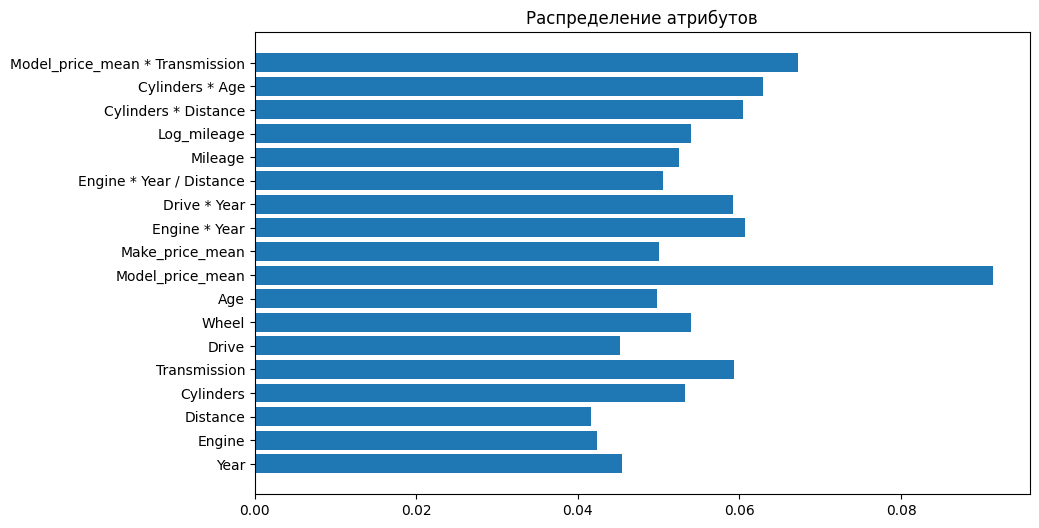

In [38]:
feature_importances = model.feature_importances_
features = X_train.columns
print(features)
print(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Распределение атрибутов')
plt.show()

# Тест
## Формируем модель для тестового набора

In [39]:
df_train = df.copy()
df_train.head()

,Price,Make,Model,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color,Age
0,16621,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,1,1,0,Black,10
1,8467,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,3,0,1,Black,15
2,11726,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,0,0,0,Silver,7
3,8781,FORD,Transit,1999,Microbus,CNG,4.0,0.0,8.0,2,2,0,Blue,22
4,3000,OPEL,Vectra,1997,Goods wagon,CNG,1.6,350000.0,4.0,2,0,0,White,24


In [40]:
df_test = pd.read_csv("/kaggle/input/cars-1-hw/cars_test.csv")
df_test.shape

(9628, 13)

In [41]:
def clear_df(df):
    df_1 = clear_any_data(df)
    df_2 = clear_transmission(df_1)
    df_3 = clear_drive(df_2)
    return df_3

In [42]:
current_year = df_train['Year'].max() + 1
def add_age(df, current_year):
    df['Age'] = (current_year - df['Year']).clip(lower=1)
    return df

In [43]:
most_common_style = df_train['Style'].mode()[0]
def replace_style(df, most_common):
    df['Style'] = df['Style'].replace({'Limousine': most_common,
                                      'Cabriolet': 'Coupe'})
    return df

In [44]:
median_dist_by_age_train = df_train.groupby('Age')['Distance'].median()
def handle_dist(df, median_dist):
    df['Distance'] = df.apply(
        lambda row: 
        median_dist[row['Age']] 
        if row['Distance'] > 1_000_000 
        else row['Distance'],
        axis=1)
    return df

In [45]:
df_test = clear_df(df_test)
df_test = add_age(df_test, current_year)
df_test = replace_style(df_test, most_common_style)
df_test = handle_dist(df_test, median_dist_by_age_train)

In [46]:
df_test['Model_price_mean'] = df_test['Model'].map(model_price_map)
df_test['Make_price_mean'] = df_test['Make'].map(make_price_map)

df_test['Model_price_mean'] = df_test['Model_price_mean'].fillna(global_mean)
df_test['Make_price_mean'] = df_test['Make_price_mean'].fillna(global_mean)

df_test = df_test.drop(['Model', 'Make'], axis=1)

def comb_metrics_for_test(df):
    df = df.copy()
    df['Engine * Year'] = np.log1p(df['Engine'] * df['Year'])
    df['Drive * Year'] = df['Drive'] * df['Year']
    df['Engine * Year / Distance'] = df['Engine * Year'] / df['Distance'].clip(lower=1)
    df['Mileage'] = df['Distance'] / df['Age']
    df['Log_mileage'] = np.log1p(df['Mileage'])
    df['Cylinders'] = np.log1p(df['Cylinders'])
    df['Cylinders * Distance'] = df['Cylinders'] * df['Distance']
    df['Cylinders * Age'] = df['Cylinders'] * df['Age']
    df['Model_price_mean * Transmission'] = df['Model_price_mean'] * df['Transmission']
    df['Model_price_mean'] = np.log1p(df['Model_price_mean'])
    return df

df_test = comb_metrics_for_test(df_test)
df_test.head()

,Year,Style,Fuel,Engine,Distance,Cylinders,Transmission,Drive,Wheel,Color,...,Model_price_mean,Make_price_mean,Engine * Year,Drive * Year,Engine * Year / Distance,Mileage,Log_mileage,Cylinders * Distance,Cylinders * Age,Model_price_mean * Transmission
0,2014,Hatchback,Plug-in Hybrid,1.4,65000.0,1.609438,0,0,0,Silver,...,9.161219,15351.232967,7.944705,0,0.000122,9285.714286,9.136340,104613.464308,11.266065,0.00
1,1997,Microbus,Diesel,2.9,3333.0,1.945910,2,2,0,Red,...,10.023152,17600.080760,8.664285,3994,0.002600,138.875000,4.940749,6485.718527,46.701844,45082.75
2,1996,Sedan,Petrol,1.8,212485.0,2.197225,2,2,0,Green,...,9.140025,17600.080760,8.186965,3992,0.000039,8499.400000,9.047869,466877.264315,54.930614,18640.00
3,2014,Jeep,Diesel,2.0,132756.0,1.609438,0,0,0,Grey,...,10.571806,22394.475648,8.301273,0,0.000063,18965.142857,9.850411,213662.539503,11.266065,0.00
4,2017,Jeep,Petrol,1.6,50750.0,1.609438,0,0,0,White,...,10.392288,30591.021858,8.079680,0,0.000159,12687.500000,9.448451,81678.974056,6.437752,0.00


In [47]:
df_test = df_test.fillna(0)
df_test = df_test.dropna().drop_duplicates()
X_test = pd.get_dummies(df_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.select_dtypes(include=[np.number]).fillna(0)
y_pred = model.predict(X_test)
df_submit = df_test[['ID']].copy()

# Обучение проводили на log(Price), преобразуем:
df_submit['Predict'] = np.expm1(y_pred)
df_submit.shape

(9618, 2)

In [48]:
df_submit.head()

,ID,Predict
0,0,14381.228516
1,1,9967.893555
2,2,6018.587891
3,3,40468.816406
4,4,40088.101562


In [50]:
df_submit.to_csv('submit.csv', index = False)
df_submit.shape

(9618, 2)